# Kagome Model in Momentum Space

In [1]:
import numpy as np

### Primitive and Reciprocal Vectors

\begin{align}
\vec{a_1} &= (2,0) \\
\vec{a_2} &= (1,\sqrt{3}) \\
\vec{a_i} \cdot \vec{b_j} &= 2\pi\delta_{ij} \\
\vec{b_1} &= (\pi,\sqrt{3}) \\
\vec{b_2} &= (0,2\pi\sqrt{3}) 
\end{align}

In [2]:
# Primitive (Bravais) vectors
a1=np.array([2,0])
a2=np.array([1,np.sqrt(3)])

# Basis Vectors (Hopping vectors)
a1_b=a1/2
a2_b=a2/2

# Reciprocal vectors
b1x = (2*np.pi/(a1[0]*a2[1]-a1[1]*a2[0])) * a2[1]
b1y = (2*np.pi/(a1[0]*a2[1]-a1[1]*a2[0])) * -a2[0]
b2x = (2*np.pi/(a1[0]*a2[1]-a1[1]*a2[0])) * -a1[1]
b2y = (2*np.pi/(a1[0]*a2[1]-a1[1]*a2[0])) * a1[0]
b1=np.array([b1x,b1y]) #(np.pi,-np.pi/np.sqrt(3))
b2=np.array([b2x,b2y]) #(0,2*np.pi/np.sqrt(3))

### Hopping Parameters

In [3]:
# t1=-1;L1=0;t2=0;L2=0; 
# t1=-1;L1=1;t2=0;L2=0; #NN (Well-Defined Berry-Curvature)
t1=-1;L1=0.28;t2=0.3;L2=0.2; #NNN (Well-Defined Berry-Curvature)

### k-space Hamiltonian

In [4]:
def Hamiltonian(t1, L1, t2, L2, k1, k2, k3):
    H = 2*t1*np.array([
    [0, np.cos(k1), np.cos(k2)],
    [np.cos(k1), 0, np.cos(k3)],        
    [np.cos(k2), np.cos(k3), 0]
    ])+2*1j*L1*np.array([
    [0, np.cos(k1), -np.cos(k2)],
    [-np.cos(k1), 0, np.cos(k3)],        
    [np.cos(k2), -np.cos(k3), 0]
    ])+2*t2*np.array([
    [0, np.cos(k2+k3), np.cos(k3-k1)],
    [np.cos(k2+k3), 0, np.cos(k1+k2)],
    [np.cos(k3-k1), np.cos(k1+k2), 0]
    ])+2*1j*L2*np.array([
    [0, -np.cos(k2+k3), np.cos(k3-k1)],
    [np.cos(k2+k3), 0, -np.cos(k1+k2)],
    [-np.cos(k3-k1), np.cos(k1+k2), 0]
    ])
    return H

### Discretization of Brilliouin Zone

In [5]:
N1 = N2 = 25
q1_list = np.arange(0,N1) / N1 
q2_list =  np.arange(0,N2) / N2; 

### Allowed k-pairs, Convention and Energy Bands

\begin{align} 
\vec{k_1} &= \vec{k}\cdot\vec{a_1}_{basis} \\ 
\vec{k_2} &= \vec{k}\cdot\vec{a_2}_{basis} \\
\vec{k_3} &= \vec{k_2}-\vec{k_1}
\end{align}

In [6]:
size = 3
E_bands=np.empty([N1,N2,size])
V=np.empty([N1,N2,size,size],dtype=complex)
Q = np.zeros([N1,N2,2])
for iq1, q1 in enumerate(q1_list):
    for iq2, q2 in enumerate(q2_list):
        Q[iq1,iq2,:] = q1*b1+q2*b2
        kx, ky = Q[iq1,iq2,:] # Allowed k-pairs
        k1=np.dot([kx,ky],a1_b);k2=np.dot([kx,ky],a2_b);k3=k2-k1 # Convention
        E_bands[iq1,iq2,:],V[iq1,iq2,:,:] = np.linalg.eigh(Hamiltonian(t1, L1, t2, L2, k1, k2, k3))

In [7]:
kx = Q[:,:,0].flatten()
ky = Q[:,:,1].flatten()

In [9]:
import matplotlib.pyplot as plt

def plot_bands(E_bands):
    
    f = plt.figure(figsize=(10,5))
    
    plt.subplot(1, 2, 1)
    for i in range(size):
        plt.plot(kx, E_bands[:,:,i].flatten(),'.')
    plt.xlabel(r"$k_x$")
    plt.ylabel(r"E")
    
    plt.subplot(1, 2, 2)
    for i in range(size):
        plt.plot(ky, E_bands[:,:,i].flatten(),'.')
    plt.xlabel(r"$k_y$")
    plt.ylabel(r"E")
    
    plt.suptitle("t1="+str(t1)+", L1="+str(L1)+", t2="+str(t2)+", L2="+str(L2))

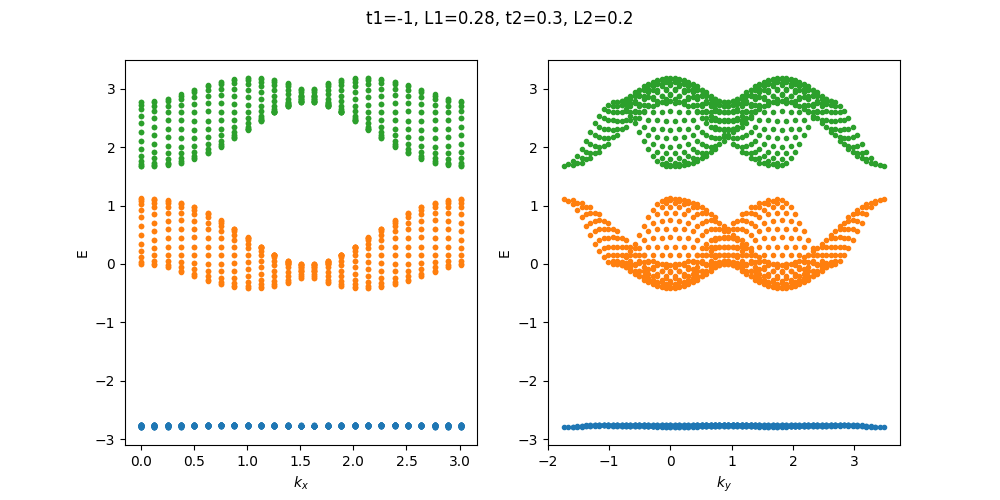

In [10]:
%matplotlib ipympl
plot_bands(E_bands)

CHERN NUMBERS CALCULATION SECTION:

https://journals.jps.jp/doi/10.1143/JPSJ.74.1674

### Link Variables

In [12]:
def build_U(vec1, vec2):
    inner_product = np.dot(vec1, vec2.conj())
    U = inner_product / np.abs(inner_product)
    return U

### Lattice Fields

In [17]:
def latF(k_vec, Dk):
    
    #convention
    kx = k_vec[0];ky = k_vec[1]
    k1=np.dot([kx,ky],a1_b);k2=np.dot([kx,ky],a2_b);k3=k2-k1
    E, aux = np.linalg.eig(Hamiltonian(t1, L1, t2, L2, k1, k2, k3))
    idx = E.argsort()
    psi = aux[:,idx] 

    kx = k_vec[0]+Dk[0];ky = k_vec[1]
    k1=np.dot([kx,ky],a1_b);k2=np.dot([kx,ky],a2_b);k3=k2-k1
    E, aux = np.linalg.eig(Hamiltonian(t1, L1, t2, L2, k1, k2, k3))
    idx = E.argsort()
    psiDx = aux[:,idx]

    kx = k_vec[0];ky = k_vec[1]+Dk[1]
    k1=np.dot([kx,ky],a1_b);k2=np.dot([kx,ky],a2_b);k3=k2-k1
    E, aux = np.linalg.eig(Hamiltonian(t1, L1, t2, L2, k1, k2, k3))
    idx = E.argsort()
    psiDy = aux[:,idx]

    kx = k_vec[0]+Dk[0];ky = k_vec[1]+Dk[1]
    k1=np.dot([kx,ky],a1_b);k2=np.dot([kx,ky],a2_b);k3=k2-k1
    E, aux = np.linalg.eig(Hamiltonian(t1, L1, t2, L2, k1, k2, k3))
    idx = E.argsort()
    psiDxDy = aux[:,idx]

    size=3
    U1x = np.zeros(size, dtype=complex)
    U2y = np.zeros(size, dtype=complex)
    U1y = np.zeros(size, dtype=complex)
    U2x = np.zeros(size, dtype=complex)

    for i in range(size):
        
        U1x[i] = build_U(psi[:,i], psiDx[:,i])
        
        U2y[i] = build_U(psi[:,i], psiDy[:,i])
        
        U1y[i] = build_U(psiDy[:,i], psiDxDy[:,i])
        
        U2x[i] = build_U(psiDx[:,i], psiDxDy[:,i])
        
    F12 = np.zeros(size, dtype=complex)
    F12 = np.log( U1x*U2x*1/U1y*1/U2y)
    # column vector
    return F12

### $\Delta \vec{k}$

In [18]:
#Dx=Delta k_x, Dy=Delta k_y (N1=N2=25)
Dx = 0.1256637061435919; Dy = 0.14510394913873714
Dk = np.array([Dx,Dy], float)

In [20]:
def calc_Cherns(latF):
    LF = np.zeros(size, dtype=complex)
    Sum = np.zeros(size, dtype=complex)
    Chern = np.zeros(size, dtype=complex)
    for iq1, q1 in enumerate(q1_list):
        for iq2, q2 in enumerate(q2_list):
            Q[iq1,iq2,:] = q1*b1+q2*b2
            kx,ky=Q[iq1,iq2,:]
            k_vec = np.array([kx,ky], float)
            LF = latF(k_vec, Dk)
            Sum += LF
    return Sum.imag/(2*np.pi)

calc_Cherns(latF)

array([-1.00000000e+00,  9.06264821e-17,  1.00000000e+00])